<a href="https://colab.research.google.com/github/andresjccc50/proyecto-final-toma-/blob/main/Copia_de_Proyecto_final_toma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Almacene el conjunto de datos seleccionado en una base de datos SQLite.
# Diseñe una o varias tablas según la estructura de los datos y establezca las relaciones necesarias si corresponde. https://www.datos.gov.co/resource/q2ja-a7uj.csv

import pandas as pd
import sqlite3

# URL del conjunto de datos
url = "https://www.datos.gov.co/resource/q2ja-a7uj.csv"

try:
    # Cargar los datos en un DataFrame de pandas
    df = pd.read_csv(url)

    # Conectar a la base de datos SQLite (o crearla si no existe)
    conn = sqlite3.connect('datos_gov_co.db')

    # Nombre de la tabla
    table_name = 'datos_q2ja_a7uj'

    # Guardar el DataFrame en una tabla de SQLite
    df.to_sql(table_name, conn, if_exists='replace', index=False)

    # Verificar que los datos se hayan guardado correctamente (opcional)
    # Consulta SQL para obtener las primeras 5 filas de la tabla
    df_verificacion = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5", conn)
    print(df_verificacion)


    conn.close()
    print(f"Los datos se han guardado exitosamente en la tabla '{table_name}' de la base de datos 'datos_gov_co.db'")


except Exception as e:
    print(f"Error al procesar los datos o guardar en la base de datos: {e}")

   orden  cod_eve                         grupo fecha_notificacion  \
0      1      365  FACTORES DE RIESGO AMBIENTAL         21/12/2014   
1      2      365  FACTORES DE RIESGO AMBIENTAL         26/12/2014   
2      3      365  FACTORES DE RIESGO AMBIENTAL         18/12/2014   
3      4      365  FACTORES DE RIESGO AMBIENTAL         23/12/2014   
4      5      365  FACTORES DE RIESGO AMBIENTAL         25/12/2014   

   semana_epidemiologica  ano_epidemiologica     cod_pre  cod_sub  edad  \
0                     50                2014  6800100792        1    57   
1                     52                2014  6800102018        1    38   
2                     51                2014  6800101157        1    33   
3                     52                2014  6800100431        1     2   
4                     52                2014  6800102018        1    19   

   uni_med_  ...         nom_eve  \
0         1  ...  INTOXICACIONES   
1         1  ...  INTOXICACIONES   
2         1  ...  IN

In [ ]:
# prompt: Importe los datos desde la base de datos SQLite utilizando pandas.
# Realice un análisis exploratorio de datos (EDA) que incluya:
# Descripción estadística básica (media, mediana, moda, desviación estándar).
# Identificación y tratamiento de valores faltantes o atípicos.
# Transformaciones o filtrados necesarios para el análisis.

import pandas as pd
import sqlite3
import numpy as np

# Conexión a la base de datos SQLite
conn = sqlite3.connect('datos_gov_co.db')

# Nombre de la tabla
table_name = 'datos_q2ja_a7uj'

try:
    # Cargar los datos desde la base de datos a un DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

    # Análisis Exploratorio de Datos (EDA)

    # 1. Descripción estadística básica
    print("\nDescripción estadística básica:")
    print(df.describe(include='all')) # incluye todas las columnas, numéricas y categóricas

    # 2. Identificación y tratamiento de valores faltantes
    print("\nValores faltantes:")
    print(df.isnull().sum())

    # Estrategia para manejar valores faltantes (Ejemplo: reemplazar con la media para columnas numéricas)
    for col in df.select_dtypes(include=np.number):
        df[col].fillna(df[col].mean(), inplace=True)

    # Para columnas categóricas se pueden usar otras estrategias
    # como reemplazar con la moda o eliminar la fila

    print("\nValores faltantes después del tratamiento:")
    print(df.isnull().sum())

    # 3. Identificación y tratamiento de valores atípicos (Ejemplo: usando el rango intercuartílico (IQR))
    print("\nTratamiento de valores atípicos:")
    for col in df.select_dtypes(include=np.number):  # Solo para columnas numéricas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


    # 4. Transformaciones o filtrados
    # Ejemplo: Filtrar datos basados en una condición
    # df_filtrado = df[df['nombre_columna'] > 10]

    # Imprimir el DataFrame después del EDA (opcional)
    #print("\nDataFrame después del EDA:")
    #print(df.head())


except Exception as e:
    print(f"Error durante el EDA: {e}")

finally:
    conn.close()


Descripción estadística básica:
              orden  cod_eve                         grupo fecha_notificacion  \
count   1000.000000   1000.0                          1000               1000   
unique          NaN      NaN                             1                699   
top             NaN      NaN  FACTORES DE RIESGO AMBIENTAL         17/10/2017   
freq            NaN      NaN                          1000                  5   
mean     500.500000    365.0                           NaN                NaN   
std      288.819436      0.0                           NaN                NaN   
min        1.000000    365.0                           NaN                NaN   
25%      250.750000    365.0                           NaN                NaN   
50%      500.500000    365.0                           NaN                NaN   
75%      750.250000    365.0                           NaN                NaN   
max     1000.000000    365.0                           NaN                Na

<ipython-input-5-c1cb9ca78f5a>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


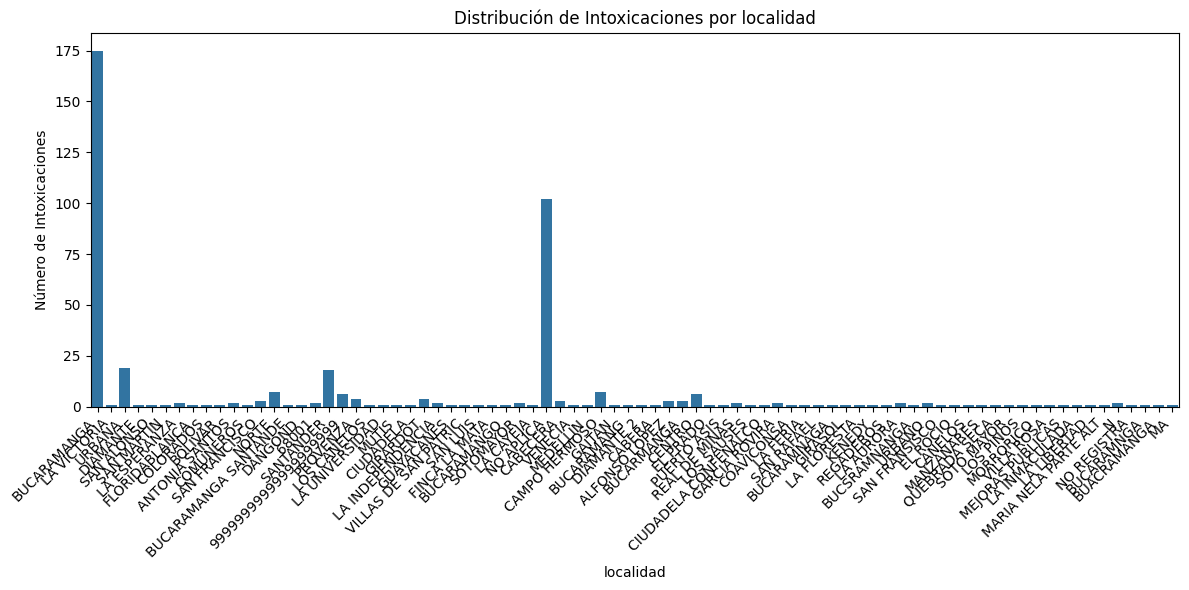

In [ ]:
# ... (rest of your code) ...

# --- Visualizaciones ---

# 1. Gráfico de barras: Distribución de intoxicaciones por localidad
plt.figure(figsize=(12, 6))
# Check if 'localidad' exists, otherwise, get the actual column name
x_col = 'localidad' if '' in df.columns else df.columns[df.columns.str.contains('localidad', case=False)].values[0]
sns.countplot(x=x_col, data=df) # Changed this line
plt.title('Distribución de Intoxicaciones por localidad')
plt.xlabel('localidad')
plt.ylabel('Número de Intoxicaciones')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout() #Ajusta el gráfico para evitar que las etiquetas se corten
plt.show()

# ... (rest of your code) ...

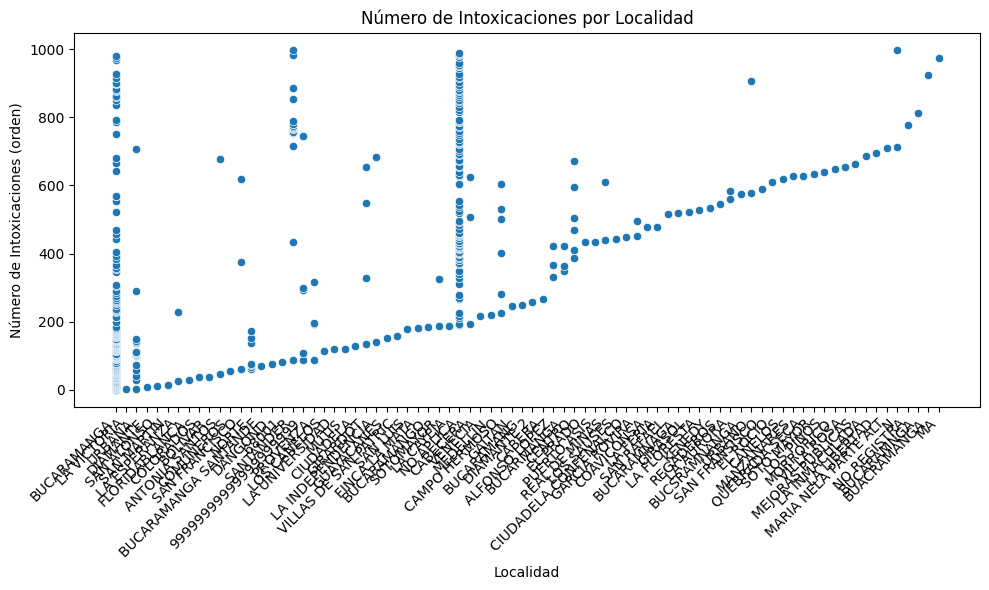

In [ ]:
# prompt: has la grafica de DISPERCION} con 'localidad'  y Número de Intoxicaciones'

# ... (your existing code) ...

# 2. Gráfico de dispersión:  Localidad vs. Número de Intoxicaciones
plt.figure(figsize=(10, 6))

# Buscar una columna numérica para representar el número de intoxicaciones
numeric_cols = df.select_dtypes(include=np.number).columns
if len(numeric_cols) > 0:
    num_col = numeric_cols[0]  # Usar la primera columna numérica encontrada

    # Check if 'localidad' exists, otherwise, get the actual column name
    x_col = 'localidad' if 'localidad' in df.columns else df.columns[df.columns.str.contains('localidad', case=False)].values[0] if df.columns[df.columns.str.contains('localidad', case=False)].values.size > 0 else None

    if x_col is not None:
      try:
          sns.scatterplot(x=x_col, y=num_col, data=df)
          plt.title('Número de Intoxicaciones por Localidad')
          plt.xlabel('Localidad')
          plt.ylabel(f'Número de Intoxicaciones ({num_col})') # Use the name of the numeric column
          plt.xticks(rotation=45, ha='right')
          plt.tight_layout()
          plt.show()

      except Exception as e:
          print(f"Error al generar el gráfico de dispersión: {e}")
    else:
        print("No se encontró una columna relacionada con 'localidad'")
else:
    print("No se encontraron columnas numéricas en el DataFrame para el gráfico de dispersión.")

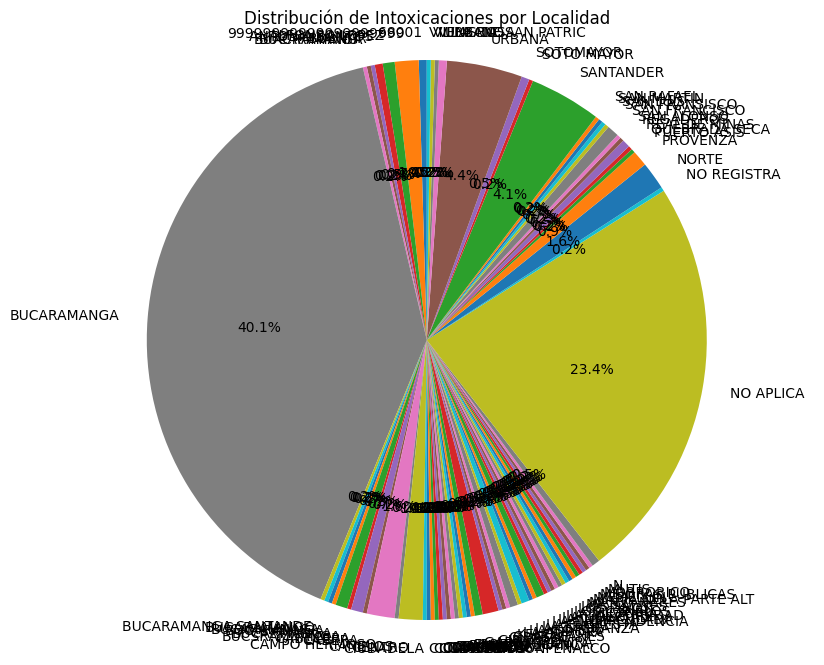

In [ ]:
# prompt: has la grafica de TORTA con 'localidad'  y Número de Intoxicaciones'

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# --- Visualizaciones ---

# 1. Gráfico de torta: Distribución de intoxicaciones por localidad
plt.figure(figsize=(10, 8))

# Check if 'localidad' exists, otherwise, get the actual column name
localidad_col = 'localidad' if 'localidad' in df.columns else df.columns[df.columns.str.contains('localidad', case=False)].values[0] if any(df.columns.str.contains('localidad', case=False)) else None


if localidad_col:
    # Agrupar por localidad y contar las intoxicaciones
    intoxicaciones_por_localidad = df.groupby(localidad_col).size()

    # Crear el gráfico de torta
    plt.pie(intoxicaciones_por_localidad, labels=intoxicaciones_por_localidad.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Intoxicaciones por Localidad')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("No se encontró una columna relacionada con 'localidad' para generar el gráfico de torta.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


2024-11-28 15:05:32.995 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 15:05:33.091 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-28 15:05:33.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 15:05:33.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 15:05:33.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 15:05:33.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 15:05:33.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 15:05:33.151 Thread 'MainThread': mi

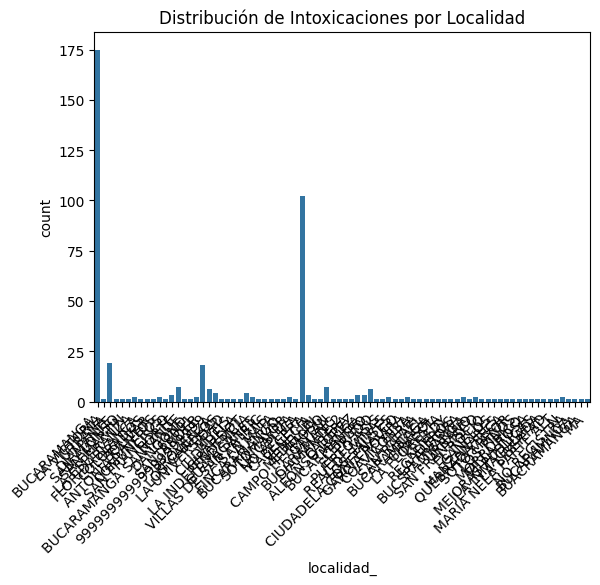

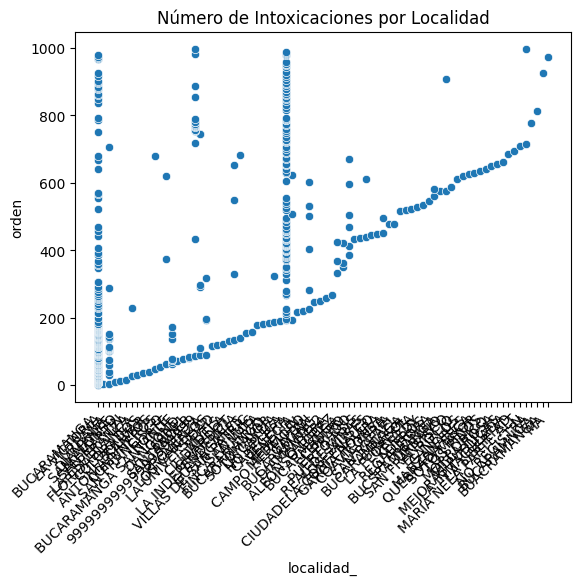

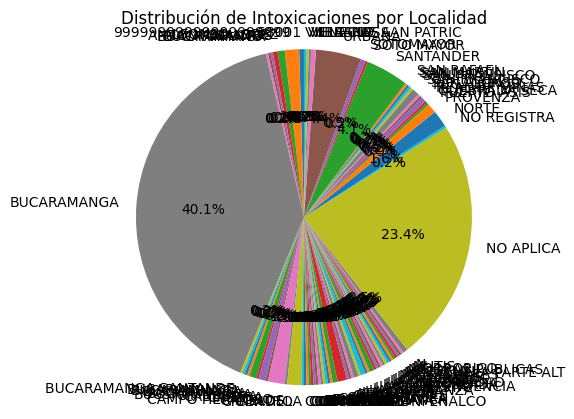

In [ ]:

!pip install streamlit # Install Streamlit

import streamlit as st # Import the Streamlit library
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (rest of the code remains unchanged) ...

# Conexión a la base de datos SQLite
conn = sqlite3.connect('datos_gov_co.db')
table_name = 'datos_q2ja_a7uj'

try:
    # Cargar los datos desde la base de datos a un DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

    # Título de la aplicación
    st.title("Análisis de Intoxicaciones")

    # Mostrar información general del DataFrame
    st.subheader("Vista previa de los datos")
    st.write(df.head())


    # --- Filtros ---
    st.sidebar.header("Filtros")

    # Filtro por rango de fechas (si existe una columna de fecha)
    if 'fecha_inicio' in df.columns:
        start_date = st.sidebar.date_input("Fecha de inicio", df['fecha_inicio'].min())
        end_date = st.sidebar.date_input("Fecha de fin", df['fecha_inicio'].max())
        df_filtered = df[(df['fecha_inicio'] >= str(start_date)) & (df['fecha_inicio'] <= str(end_date))]
    else:
        df_filtered = df  # No se aplica filtro si no hay columna de fecha

    # Otros filtros (ejemplo para columna "localidad")
    localidad_col = 'localidad' if 'localidad' in df.columns else df.columns[df.columns.str.contains('localidad', case=False)].values[0] if any(df.columns.str.contains('localidad', case=False)) else None

    if localidad_col:
        selected_localidad = st.sidebar.multiselect("Localidad", df_filtered[localidad_col].unique())
        if selected_localidad:
            df_filtered = df_filtered[df_filtered[localidad_col].isin(selected_localidad)]

    # --- Visualizaciones ---
    st.subheader("Visualizaciones")

    # 1. Gráfico de barras (Distribución de intoxicaciones por localidad)
    if localidad_col:
        fig, ax = plt.subplots()
        sns.countplot(x=localidad_col, data=df_filtered, ax=ax)
        plt.xticks(rotation=45, ha='right')
        plt.title('Distribución de Intoxicaciones por Localidad')
        st.pyplot(fig)
    else:
        st.warning("No se encontró una columna relacionada con la localidad.")

    # 2. Gráfico de dispersión
    numeric_cols = df_filtered.select_dtypes(include=np.number).columns
    if len(numeric_cols) > 0 and localidad_col:
        num_col = numeric_cols[0]  # Usar la primera columna numérica encontrada
        fig, ax = plt.subplots()
        sns.scatterplot(x=localidad_col, y=num_col, data=df_filtered, ax=ax)
        plt.xticks(rotation=45, ha='right')
        plt.title('Número de Intoxicaciones por Localidad')
        st.pyplot(fig)
    elif not localidad_col:
        st.warning("No se encontró una columna relacionada con la localidad.")
    else:
      st.warning("No se encontraron columnas numéricas en el DataFrame para el gráfico de dispersión.")

    # 3. Gráfico de torta (Distribución de intoxicaciones por localidad)
    if localidad_col:
        intoxicaciones_por_localidad = df_filtered.groupby(localidad_col).size()
        fig, ax = plt.subplots()
        plt.pie(intoxicaciones_por_localidad, labels=intoxicaciones_por_localidad.index, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Distribución de Intoxicaciones por Localidad')
        st.pyplot(fig)
    else:
        st.warning("No se encontró una columna relacionada con la localidad.")

    # ... (Agregar más visualizaciones)

except Exception as e:
    st.error(f"Error al cargar los datos o generar las visualizaciones: {e}")

finally:
    conn.close()